In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model import naive_bayes
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
import random

### Instagram Information

In [2]:
# Load Instagram information from CSV into a DataFrame
instagram_data = pd.read_csv('datasets/instagram_all.csv')

In [3]:
instagram_data = instagram_data.drop(columns=['Comments on Others (4)', 'Comments on post (1)'])
instagram_data.dtypes

Unnamed: 0                              int64
Start Date                             object
End Date                               object
Instagram_handle                       object
Name                                   object
no_of_posts                             int64
story_posted                            int64
picture_description                    object
post_captions                          object
post_hastags                           object
post_tag_by_you                         int64
post_tag_to_you                         int64
your_followers                          int64
you_following                           int64
interaction_with_your_friends           int64
your_close_friends                      int64
interaction_with_your_close_friends     int64
all_comments_by_you                    object
all_comments_to_you                    object
BY_score                               object
TO_score                               object
description_score                 

In [4]:
instagram_data['Start Date'] = pd.to_datetime(instagram_data['Start Date'])
instagram_data['End Date'] = pd.to_datetime(instagram_data['End Date'])

In [5]:
instagram_data = instagram_data.sort_values(by='Start Date', ascending=False)
instagram_data

,Unnamed: 0,Start Date,End Date,Instagram_handle,Name,no_of_posts,story_posted,picture_description,post_captions,post_hastags,...,your_close_friends,interaction_with_your_close_friends,all_comments_by_you,all_comments_to_you,BY_score,TO_score,description_score,caption_Score,story_views,hours_spent
97,97,2034-12-10,2035-01-05,art_enthusiast,Nova Thompson,45,6,"Artistic creations, Creative expressions, Visu...","Creative expressions, Visual arts, Art history...","art, creations, visual arts, history, exhibiti...",...,650,1880,['Appalled by the lack of access to education ...,['Saddened by the destruction caused by natura...,"[-0.6486, -0.34, -0.7906, 0.8591, -0.5423, 0.7...","[-0.8481, 0.7906, 0, -0.4404, 0.25, 0.743, 0.6...","[0.3818, 0.4404, 0.0, 0.0, 0.0, 0.4767]","[0.4404, 0.0, 0.0, 0.0, 0.4767, 0.3818]",8925,11
96,96,2034-11-10,2034-12-05,pet_lover,Zara Martinez,46,7,"Adorable pets, Pet adoption, Animal welfare, P...","Pet adoption, Animal welfare, Pet care tips, P...","pets, pet adoption, animal welfare, pet care, ...",...,633,1840,['Repulsed by the lack of action on human traf...,['Infuriated by the lack of action on climate ...,"[-0.6705, -0.8481, -0.2263, 0, -0.6597, 0.4767...","[-0.743, -0.6486, 0.5106, 0.7506, 0.4767, 0.79...","[0.4939, 0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767]","[0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767, 0.4939]",10298,6
95,95,2034-10-10,2034-11-05,fitness_fanatic,Eliana Johnson,47,8,"Workout routines, Fitness motivation, Healthy ...","Fitness motivation, Healthy lifestyle, Strengt...","fitness, workout, healthy, strength training, ...",...,617,1800,['Appalled by the lack of access to education ...,['Finding peace in the midst of a chaotic day'...,"[-0.6486, 0.5423, -0.7184, -0.7184, 0.2263, 0....","[0.0772, 0.7351, -0.836, 0.7906, -0.7184, 0, 0...","[0.0, 0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0]","[0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0]",6607,1
94,94,2034-09-10,2034-10-05,traveling_foodie,Aria Smith,48,9,"Culinary adventures, Exotic cuisines, Food pho...","Exotic cuisines, Food photography, Local delic...","foodie, travel, culinary, food photography, lo...",...,600,1760,['Infuriated by the lack of action on gender-b...,['Touched by a heartwarming act of kindness fr...,"[-0.886, 0.5859, 0.34, 0, 0, 0, 0, 0, 0]","[0.7269, 0, 0, 0, 0, 0, 0, 0, 0]","[0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023, 0.34]",3308,10
93,93,2034-08-10,2034-09-05,vintage_vibes,Peyton Kim,40,3,"Retro fashion, Vintage decor, Classic cars","Vintage decor, Classic cars, Retro fashion","vintage, retro, fashion, decor, classic cars",...,583,1720,"['Feeling a sense of longing for a lost pet', ...",['Proud of the achievements of a family member...,"[-0.2263, 0.5423, 0.6369, -0.7184, 0.4404, -0....","[0.4767, -0.34, 0.5859, 0.4404, 0.4215, 0.1027...","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",8455,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,2024-02-12,2024-03-10,gourmet_affair,Oscar Martinez,20,5,"Exotic culinary delights, Gourmet food tasting...","Indulging in gastronomic wonders, Savoring uni...","foodie, gourmet, cooking, culinary, dessert",...,28,81,['Embracing the peace and quiet of a relaxing ...,['Angry at the lack of support for mental heal...,"[0.7717, -0.6705, 0, 0, 0, 0, 0, 0, 0]","[-0.4404, 0.6369, 0.5423, 0, 0, 0, 0, 0, 0]","[0.4588, 0.0, 0.0, 0.0, 0.743]","[0.0, 0.0, 0.0, 0.4588, 0.4588]",6518,8
3,3,2024-01-01,2024-01-30,adventurous_soul,Elena Rodriguez,25,7,"Hiking in the mountains, Camping under the sta...","Embracing nature's wonders, Sleeping under the...","nature, adventure, camping, hiking, wildlife",...,32,92,['Furious about the lack of action on climate ...,['Disgusted by the lack of empathy in society'...,"[-0.7184, 0.5719, 0, 0, 0, 0, 0, 0, 0]","[-0.6908, 0.7906, 0.7184, -0.836, 0.7351, 0.05...","[0.0, 0.0, 0.0, 0.34, 0.4588, 0.0, 0.4939]","[0.0, 0.0, 0.4588, 0.0, 0.0, 0.0, 0.4215]",1448,1
2,2,2023-11-20,2023-12-15,m

### Comments and Concerns

In [6]:
comments_and_concerns = pd.read_csv('datasets/comment_db.csv')
motivation = pd.read_csv('datasets/motivational_quotes.csv')

In [7]:
instagram_data

,Unnamed: 0,Start Date,End Date,Instagram_handle,Name,no_of_posts,story_posted,picture_description,post_captions,post_hastags,...,your_close_friends,interaction_with_your_close_friends,all_comments_by_you,all_comments_to_you,BY_score,TO_score,description_score,caption_Score,story_views,hours_spent
97,97,2034-12-10,2035-01-05,art_enthusiast,Nova Thompson,45,6,"Artistic creations, Creative expressions, Visu...","Creative expressions, Visual arts, Art history...","art, creations, visual arts, history, exhibiti...",...,650,1880,['Appalled by the lack of access to education ...,['Saddened by the destruction caused by natura...,"[-0.6486, -0.34, -0.7906, 0.8591, -0.5423, 0.7...","[-0.8481, 0.7906, 0, -0.4404, 0.25, 0.743, 0.6...","[0.3818, 0.4404, 0.0, 0.0, 0.0, 0.4767]","[0.4404, 0.0, 0.0, 0.0, 0.4767, 0.3818]",8925,11
96,96,2034-11-10,2034-12-05,pet_lover,Zara Martinez,46,7,"Adorable pets, Pet adoption, Animal welfare, P...","Pet adoption, Animal welfare, Pet care tips, P...","pets, pet adoption, animal welfare, pet care, ...",...,633,1840,['Repulsed by the lack of action on human traf...,['Infuriated by the lack of action on climate ...,"[-0.6705, -0.8481, -0.2263, 0, -0.6597, 0.4767...","[-0.743, -0.6486, 0.5106, 0.7506, 0.4767, 0.79...","[0.4939, 0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767]","[0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767, 0.4939]",10298,6
95,95,2034-10-10,2034-11-05,fitness_fanatic,Eliana Johnson,47,8,"Workout routines, Fitness motivation, Healthy ...","Fitness motivation, Healthy lifestyle, Strengt...","fitness, workout, healthy, strength training, ...",...,617,1800,['Appalled by the lack of access to education ...,['Finding peace in the midst of a chaotic day'...,"[-0.6486, 0.5423, -0.7184, -0.7184, 0.2263, 0....","[0.0772, 0.7351, -0.836, 0.7906, -0.7184, 0, 0...","[0.0, 0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0]","[0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0]",6607,1
94,94,2034-09-10,2034-10-05,traveling_foodie,Aria Smith,48,9,"Culinary adventures, Exotic cuisines, Food pho...","Exotic cuisines, Food photography, Local delic...","foodie, travel, culinary, food photography, lo...",...,600,1760,['Infuriated by the lack of action on gender-b...,['Touched by a heartwarming act of kindness fr...,"[-0.886, 0.5859, 0.34, 0, 0, 0, 0, 0, 0]","[0.7269, 0, 0, 0, 0, 0, 0, 0, 0]","[0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023, 0.34]",3308,10
93,93,2034-08-10,2034-09-05,vintage_vibes,Peyton Kim,40,3,"Retro fashion, Vintage decor, Classic cars","Vintage decor, Classic cars, Retro fashion","vintage, retro, fashion, decor, classic cars",...,583,1720,"['Feeling a sense of longing for a lost pet', ...",['Proud of the achievements of a family member...,"[-0.2263, 0.5423, 0.6369, -0.7184, 0.4404, -0....","[0.4767, -0.34, 0.5859, 0.4404, 0.4215, 0.1027...","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",8455,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,2024-02-12,2024-03-10,gourmet_affair,Oscar Martinez,20,5,"Exotic culinary delights, Gourmet food tasting...","Indulging in gastronomic wonders, Savoring uni...","foodie, gourmet, cooking, culinary, dessert",...,28,81,['Embracing the peace and quiet of a relaxing ...,['Angry at the lack of support for mental heal...,"[0.7717, -0.6705, 0, 0, 0, 0, 0, 0, 0]","[-0.4404, 0.6369, 0.5423, 0, 0, 0, 0, 0, 0]","[0.4588, 0.0, 0.0, 0.0, 0.743]","[0.0, 0.0, 0.0, 0.4588, 0.4588]",6518,8
3,3,2024-01-01,2024-01-30,adventurous_soul,Elena Rodriguez,25,7,"Hiking in the mountains, Camping under the sta...","Embracing nature's wonders, Sleeping under the...","nature, adventure, camping, hiking, wildlife",...,32,92,['Furious about the lack of action on climate ...,['Disgusted by the lack of empathy in society'...,"[-0.7184, 0.5719, 0, 0, 0, 0, 0, 0, 0]","[-0.6908, 0.7906, 0.7184, -0.836, 0.7351, 0.05...","[0.0, 0.0, 0.0, 0.34, 0.4588, 0.0, 0.4939]","[0.0, 0.0, 0.4588, 0.0, 0.0, 0.0, 0.4215]",1448,1
2,2,2023-11-20,2023-12-15,m

In [8]:
X = comments_and_concerns['comments']
y = comments_and_concerns['emotion']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [10]:
nb_model = naive_bayes()

def naive_bayes_train(X_train, y_train):
    nb_model.train(X_train, y_train)

def naive_bayes_prediction(X_test):
    combined_emotion = nb_model.predict_model(X_test)
    return combined_emotion

### Prompt and Answer

In [11]:
instagram_data.head(9)

,Unnamed: 0,Start Date,End Date,Instagram_handle,Name,no_of_posts,story_posted,picture_description,post_captions,post_hastags,...,your_close_friends,interaction_with_your_close_friends,all_comments_by_you,all_comments_to_you,BY_score,TO_score,description_score,caption_Score,story_views,hours_spent
97,97,2034-12-10,2035-01-05,art_enthusiast,Nova Thompson,45,6,"Artistic creations, Creative expressions, Visu...","Creative expressions, Visual arts, Art history...","art, creations, visual arts, history, exhibiti...",...,650,1880,['Appalled by the lack of access to education ...,['Saddened by the destruction caused by natura...,"[-0.6486, -0.34, -0.7906, 0.8591, -0.5423, 0.7...","[-0.8481, 0.7906, 0, -0.4404, 0.25, 0.743, 0.6...","[0.3818, 0.4404, 0.0, 0.0, 0.0, 0.4767]","[0.4404, 0.0, 0.0, 0.0, 0.4767, 0.3818]",8925,11
96,96,2034-11-10,2034-12-05,pet_lover,Zara Martinez,46,7,"Adorable pets, Pet adoption, Animal welfare, P...","Pet adoption, Animal welfare, Pet care tips, P...","pets, pet adoption, animal welfare, pet care, ...",...,633,1840,['Repulsed by the lack of action on human traf...,['Infuriated by the lack of action on climate ...,"[-0.6705, -0.8481, -0.2263, 0, -0.6597, 0.4767...","[-0.743, -0.6486, 0.5106, 0.7506, 0.4767, 0.79...","[0.4939, 0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767]","[0.0, 0.0, 0.4939, 0.0, 0.4588, 0.4767, 0.4939]",10298,6
95,95,2034-10-10,2034-11-05,fitness_fanatic,Eliana Johnson,47,8,"Workout routines, Fitness motivation, Healthy ...","Fitness motivation, Healthy lifestyle, Strengt...","fitness, workout, healthy, strength training, ...",...,617,1800,['Appalled by the lack of access to education ...,['Finding peace in the midst of a chaotic day'...,"[-0.6486, 0.5423, -0.7184, -0.7184, 0.2263, 0....","[0.0772, 0.7351, -0.836, 0.7906, -0.7184, 0, 0...","[0.0, 0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0]","[0.5423, 0.4019, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0]",6607,1
94,94,2034-09-10,2034-10-05,traveling_foodie,Aria Smith,48,9,"Culinary adventures, Exotic cuisines, Food pho...","Exotic cuisines, Food photography, Local delic...","foodie, travel, culinary, food photography, lo...",...,600,1760,['Infuriated by the lack of action on gender-b...,['Touched by a heartwarming act of kindness fr...,"[-0.886, 0.5859, 0.34, 0, 0, 0, 0, 0, 0]","[0.7269, 0, 0, 0, 0, 0, 0, 0, 0]","[0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2023, 0.34]",3308,10
93,93,2034-08-10,2034-09-05,vintage_vibes,Peyton Kim,40,3,"Retro fashion, Vintage decor, Classic cars","Vintage decor, Classic cars, Retro fashion","vintage, retro, fashion, decor, classic cars",...,583,1720,"['Feeling a sense of longing for a lost pet', ...",['Proud of the achievements of a family member...,"[-0.2263, 0.5423, 0.6369, -0.7184, 0.4404, -0....","[0.4767, -0.34, 0.5859, 0.4404, 0.4215, 0.1027...","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",8455,5
92,92,2034-07-10,2034-08-05,bookworm_bibliophile,Skylar Nguyen,41,4,"Literary classics, Fictional tales, Mystery no...","Fictional tales, Mystery novels, Historical ep...","books, fiction, mystery, historical",...,567,1680,['Furious about the lack of action on environm...,['Proud of the progress made in personal growt...,"[-0.7184, 0, 0, 0, 0, 0, 0, 0, 0]","[0.8176, 0.7184, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",9756,3
91,91,2034-06-10,2034-07-05,adventure_seeker,Riley Garcia,42,5,"Adventure travel, Thrill-seeking activities, E...","Thrill-seeking activities, Extreme sports, Sky...","adventure, travel, extreme sports, thrill, sky...",...,550,1640,"['Overwhelmed by the loss of a loved one', 'Am...",['Feeling a sense of longing for a childhood f...,"[0.4215, 0.8591, 0, 0, 0, 0, 0, 0, 0]","[0.5574, 0.743, -0.8658, 0.4767, 0.5423, 0.458...","[0.3182, 0.0, 0.0, 0.0, 0.0772, 0.0]","[0.0, 0.0, 0.0, 0.0772, 0.0, 0.3182]",9184,7
90,90,2034-05-10,2034-06-05,music_melodies,Kai Patel,43,6,"Melodic beats, Soulful rhythms, Harmonious tun...","Soulful rhythms, Harmonious tunes, Mu

In [12]:
def emotion_circle(overall_emotion):
    # Calculate the unique emotions and their counts
    unique_emotions, emotion_counts = np.unique(overall_emotion, return_counts=True)
    
    # Create a dictionary from the unique emotions and their counts
    overall_emotion_dict = dict(zip(unique_emotions, emotion_counts))
    
    # Calculate the total number of emotions
    total_emotions = sum(emotion_counts)
    
    # Calculate the probability of each emotion
    emotion_probabilities = {emotion: count / total_emotions for emotion, count in overall_emotion_dict.items()}

    # Plot the pie chart using probabilities
    plt.figure(figsize=(8, 8))
    plt.pie(emotion_probabilities.values(), labels=emotion_probabilities.keys(), autopct='%1.1f%%')
    plt.title('Distribution of Emotions')
    plt.show()

    return emotion_probabilities


In [22]:
# Function to get motivational quote based on emotion
def get_motivational_quote(emotion):

    # Filter DataFrame for the given emotion
    quotes = motivation[motivation['emotions'] == emotion]['encouraging_quotes']
    # print(quotes)
    
    # If no quote found for the emotion, return a default message
    if quotes.empty:
        return "Being emotionless is also an emotion"
    
    # Select a random quote from the filtered quotes
    random_quote = random.choice(quotes)
    print(random_quote)
    return random_quote

In [14]:
# em = ['happy', 'sad', 'c', 'd', 'f', 'f', 'c']
# prob = emotion_circle(em)
# main_em = max(prob)
# get_motivational_quote(main_em)

In [23]:
naive_bayes_train(X_train, y_train)

In [24]:
def get_instagram_info(handle):
    # Filter the DataFrame for the provided Instagram handle
    profile_info = instagram_data[instagram_data['Instagram_handle'] == handle]

    print('Let us dive into your profile from last week')
    profile_info.columns
    # Check if the handle exists in the DataFrame
    if not profile_info.empty:
        # Display the information
        print("Instagram Handle:", profile_info['Instagram_handle'].values[0])
        print("Name:", profile_info['Name'].values[0])
        print("Number of Pictures:", profile_info['no_of_posts'].values[0])
        print("Stories Posted:", profile_info['story_posted'].values[0])
        print("Number of user you have tagged:", profile_info['post_tag_by_you'].values[0])
        print("Number of users whom have tagged you:", profile_info['post_tag_to_you'].values[0])
        print("Number of times you have commented on someone's post:", profile_info['all_comments_by_you'].values[0])
        print("Followers:", profile_info['your_followers'].values[0])
        print("Following:", profile_info['you_following'].values[0])
        print("Interactions with Friends:", profile_info['interaction_with_your_friends'].values[0])
        print("Close Friends:", profile_info['your_close_friends'].values[0])
        print("Interactions with Close Friends:", profile_info['interaction_with_your_close_friends'].values[0])
        # emotion throughout the comments-All BY_score 

        print('Your emotion wrapped >')
        combined_emotion = naive_bayes_prediction(X_test)

        print("Overall Emotion:")
        
        emotion_probabilities = emotion_circle(combined_emotion)

        main_emotion = max(emotion_probabilities)
        
        phrases = get_motivational_quote(main_emotion)
        print('Quote: ', main_emotion)
        
    else:
        print("Instagram handle not found.")

Let us dive into your profile from last week
Instagram Handle: pet_lover
Name: Zara Martinez
Number of Pictures: 46
Stories Posted: 7
Number of user you have tagged: 66
Number of users whom have tagged you: 66
Number of times you have commented on someone's post: ['Repulsed by the lack of action on human trafficking', 'Saddened by the destruction caused by natural disasters', 'Disgusted by the exploitation of natural resources', 'Taken aback by the sudden change in weather', 'Furious about the lack of action on global warming', 'Proud to witness the achievements of the younger generation', 'Angry at the lack of support for mental health services', 'Furious about the lack of action on climate change', 'None']
Followers: 19000
Following: 164000
Interactions with Friends: 1900
Close Friends: 633
Interactions with Close Friends: 1840
Your emotion wrapped >
Overall Emotion:


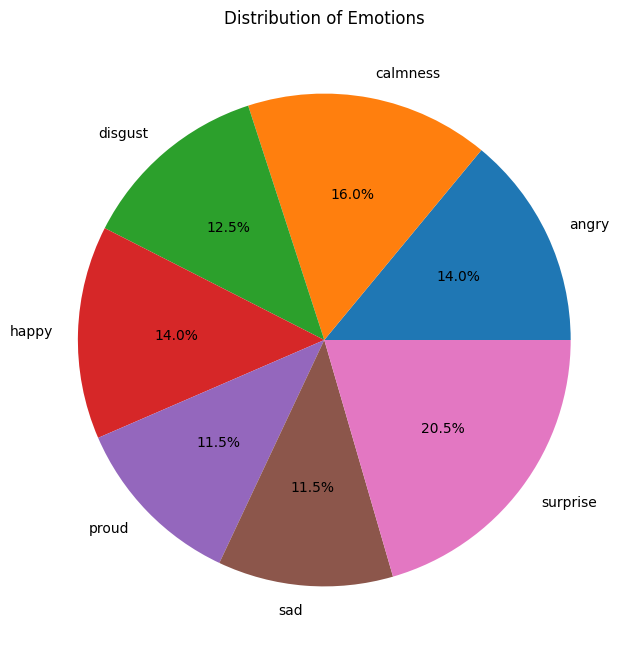

2           Stay positive, embrace the unexpected
9         Life is full of surprises, embrace them
16       Surprises often lead to valuable lessons
23       Surprises often lead to valuable lessons
30     Surprise yourself with your own resilience
37        Surprises often lead to valuable growth
44     Surprise yourself with your own resilience
51     Embrace the unexpected, it leads to growth
58        Life is full of surprises, embrace them
65        Life is full of surprises, embrace them
72        Life is full of surprises, embrace them
79        Life is full of surprises, embrace them
86       Surprises often lead to valuable lessons
93         Surprise yourself with new experiences
100    Embrace the unexpected, it leads to growth
107        Surprise yourself with your resilience
114       Life is full of surprises, embrace them
Name: encouraging_quotes, dtype: object
Surprises often lead to valuable lessons
Quote:  surprise


In [25]:
# Example usage
handle_input = input("Enter the Instagram handle: ")
get_instagram_info(handle_input)
